<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/Project5/session5L2Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code below has image normalization, L2 kernel regularization, batch normalization. The best model is saved to google drive.


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X1_test = X_test #using X1_test to print the wrongly predicted at the end of the program.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


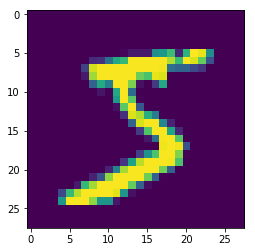

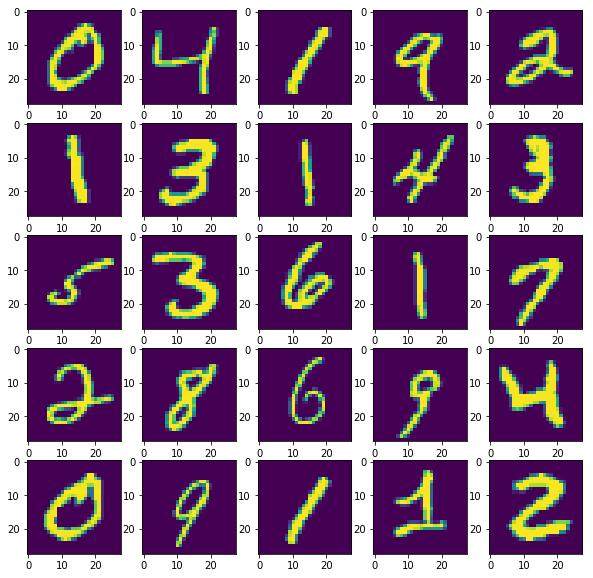

In [130]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# print the X_train in the columns x row matrix
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, columns*rows +1 ):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()





# reshape dataset to have a single channel

In [131]:
print(y_train[0])
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train.shape

5


(60000, 28, 28, 1)

In [0]:
#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255

In [133]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [135]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Image Normalization

Mean(StDeviation) X_train=33.318 (78.567), X_test=33.791 (79.172)
Data Generator mean=33.791, std=79.172
No of Batches train=938, test=157
Per batch shape=(64, 28, 28, 1), mean=0.012, std=1.013
Epoch 1/5
938/938 [==============================] - 9s 10ms/step - loss: 0.1429 - acc: 0.9564
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0456 - acc: 0.9856
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0318 - acc: 0.9900
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0235 - acc: 0.9925
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0192 - acc: 0.9941
Epoch 1/5
157/157 [==============================] - 1s 7ms/step - loss: 0.0276 - acc: 0.9904
Epoch 2/5
157/157 [==============================] - 1s 6ms/step - loss: 0.0081 - acc: 0.9973
Epoch 3/5
157/157 [==============================] - 1s 6ms/step - loss: 0.0032 - acc: 0.9994
Epoch 4/5
157/157 [==============================] - 

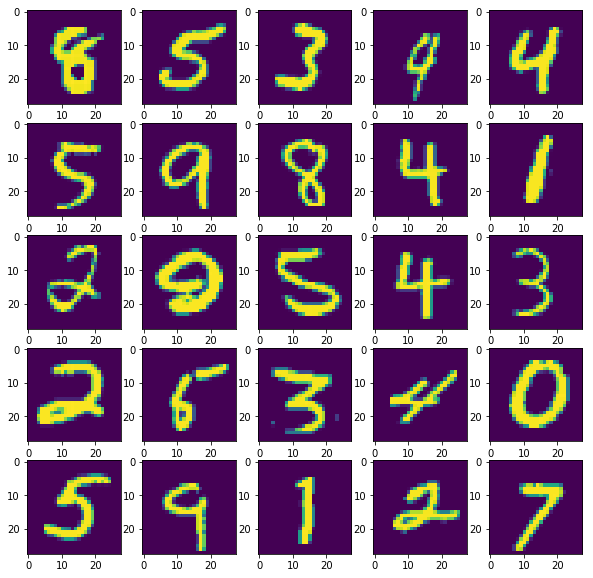

In [136]:
# report pixel means and standard deviations before image normalization
print('Mean(StDeviation) X_train=%.3f (%.3f), X_test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
from keras.preprocessing.image import ImageDataGenerator
# create generator to standardize images
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate mean on training dataset
datagen.fit(X_train)
datagen.fit(X_test)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# prepare an iterators to scale images
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)
print('No of Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))

# print the mean and std-dev for one batch to confirm if its between 0 and 1
batchX, batchy = train_iterator.next()
print('Per batch shape=%s, mean=%.3f, std=%.3f' % (batchX.shape, batchX.mean(), batchX.std()))

# define model
model = Sequential()
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #26
model.add(MaxPooling2D(pool_size=(2, 2))) #13
model.add(Convolution2D(64, (3, 3), activation='relu')) #6
model.add(MaxPooling2D(pool_size=(2, 2))) #3
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()
# fit model with generator
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=5)
model.fit_generator(test_iterator, steps_per_epoch=len(test_iterator), epochs=5)
# evaluate model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

for x, y in train_iterator:
  x1 = x.reshape(x.shape[0], 28, 28)
  # print the X_train in the columns x row matrix
  fig=plt.figure(figsize=(10, 10))
  columns = 5
  rows = 5
  for i in range(1, columns*rows +1 ):
      img = x1[i]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()
  break



Dropout regularization after each layer, BN before RELU

In [137]:
from keras.layers import Activation
from keras import regularizers
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(28,28,1))) # receptive field = 26
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 24
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 24
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 10
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 8
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01))) # 6
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,1, activation='relu', kernel_regularizer=regularizers.l2(0.01))) #6
model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", kernel_regularizer=<keras.reg..., input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API

In [138]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_115 (Conv2D)          (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_88 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_89 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 24, 24, 10)        170       
_________________________________________________________________
batch_normalization_90 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 10)        0         
__________

In [139]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p modelstore
!google-drive-ocamlfuse modelstore
!ls /content/modelstore

from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import os
import math
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

filepath="modelstore/kernel-reg-weights-improvement-{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint_dir = os.path.dirname(filepath)
!ls {checkpoint_dir}
print( os.getcwd() )
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

E: Package 'python-software-properties' has no installation candidate
··········
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
'Colab Notebooks'
 EIPImandi
 EIPSessions
 EVA
 EVA_S1.ipynb
'Getting started'
 installKeras.ipynb
 modelstore
 mountdrive.ipynb
'Sleep latency vs respiratory rate 2019-02-19 14.38.01.png'
 Untitled0.ipynb
 weights-improvement-01-0.9601.hdf5
 weights-improvement-02-0.9878.hdf5
 weights-improvement-03-0.9894.hdf5
 weights-improvement-06-0.9900.hdf5
 weights-improvement-07-0.9927.hdf5
 weights-improvement-10-0.9933.hdf5
 weights-improvement-11-0.9940.hdf5
 weights-improvement-16-0.9941.hdf5
 weights-improvement-21-0.9946.hdf5
 weights-improvement-25-0.9948.hdf5
 weights-improvement-40-0.9950.hdf5
'Colab Notebooks'
 EIPImandi
 EIPSessions
 EVA
 EVA_S1.ipynb
'Getting started'
 installKeras.ipynb
 modelstore
 mountdrive.ipynb
'Sleep latency vs respiratory rate 2019-02-19 14.38.01.png'
 Untitled0.ipynb
 weights-impr

In [140]:
history  = model.fit(X_train, Y_train, batch_size=64, nb_epoch=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 18s 299us/step - loss: 0.3906 - acc: 0.9555 - val_loss: 0.2480 - val_acc: 0.9530

Epoch 00001: val_acc improved from -inf to 0.95300, saving model to modelstore/kernel-reg-weights-improvement-01-0.9530.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 183us/step - loss: 0.1430 - acc: 0.9785 - val_loss: 0.2298 - val_acc: 0.9550

Epoch 00002: val_acc improved from 0.95300 to 0.95500, saving model to modelstore/kernel-reg-weights-improvement-02-0.9550.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 185us/step - loss: 0.1174 - acc: 0.9813 - val_loss: 0.1449 - val_acc: 0.9724

Epoch 00003: val_acc improved from 0.95500 to 0.97240, savi

In [0]:
_, train_score = model.evaluate(X_train, Y_train, verbose=0)
_, test_score = model.evaluate(X_test, Y_test, verbose=0)

0.9904
Train: 0.996, Test: 0.990


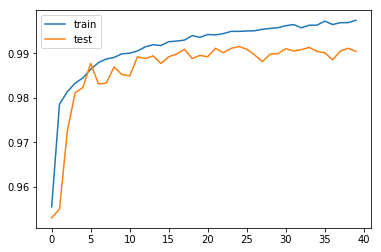

In [142]:
print(test_score)
print('Train: %.3f, Test: %.3f' % (train_score, test_score))
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [0]:
y_pred = model.predict(X_test)

[7 2 1 0 4 1 4 9 5] (10000,) 7
[7 2 1 0 4 1 4 9 5] (10000,) 7
99


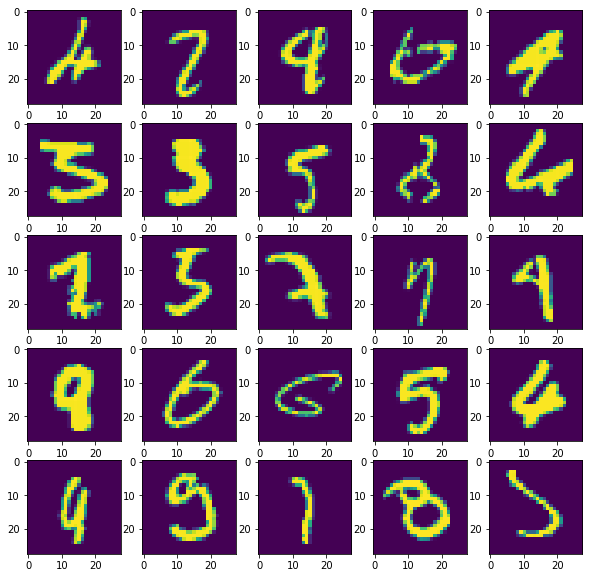

In [144]:
import numpy as np

#generate the array of predicted labels of the images. - new_y_pred
#y_test is the label for each image in X_test (reshaped) or X1_test (before reshaping)
y_pred1 = np.rint(y_pred) # round the values to either 0 or 1.
array_new_y_pred = y_pred1.argmax(1) # create the 1-d array similar to y_test

#compare the arrays array_new_y_pred and y_test and find the missing elements. The print the missing elements from X1_test
missed_images = []
for x in range(len(array_new_y_pred)):
  if array_new_y_pred[x] != y_test[x]:
    #print(x, y_test[x], array_new_y_pred[x])
    missed_images.append(X1_test[x])

print(array_new_y_pred[:9], array_new_y_pred.shape, array_new_y_pred[0])
print(y_test[:9], y_test.shape, y_test[0])
print(len(missed_images))
#print(missed_images[0])

# print the X_train in the columns x row matrix
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, columns*rows +1 ):
    img = missed_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

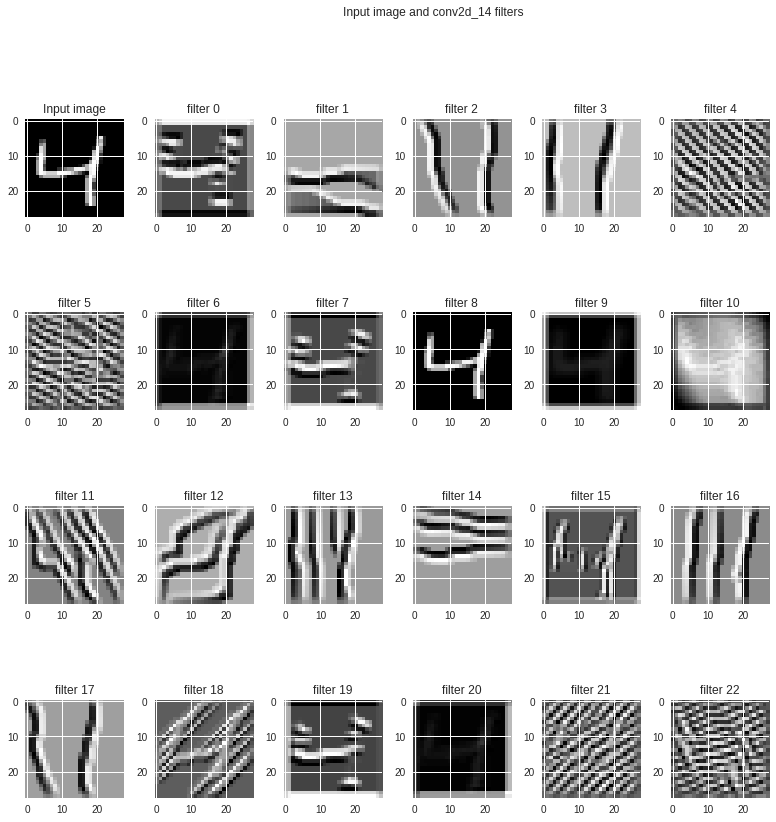

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()